In [158]:
import os
import struct
os.chdir('E:/day3/run8')
from array import array
import numpy as np
filename='accel0'
# read as big endian ">" single precision "f"
ac0=np.fromfile(filename, dtype='>f') 
# initialize size 
sl=len(ac0)/200
acc=np.empty((sl,200,6))
dat=np.empty((sl,1000,8))
# load accel
for i in range(6):
    filename='accel'+str(i)
    # read as big endian ">" single precision "f"
    ac=np.fromfile(filename, dtype='>f') 
    acc[:,:,i]=np.reshape(ac,(sl,200))
# load ch
for i in range(8):
    filename='ch'+str(i)
    # read as big endian ">" single precision "f"
    ch=np.fromfile(filename, dtype='>f') 
    dat[:,:,i]=np.reshape(ch,(sl,1000))

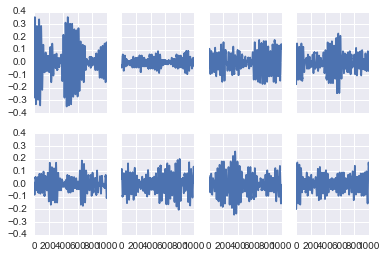

In [39]:
#validate data
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
wfm=(dat[10,:,1])
x=range(0,1000)
f, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2,4, sharex=True, sharey=True)
ax1.plot(x, dat[100,:,0])
ax2.plot(x, dat[100,:,1])
ax3.plot(x, dat[100,:,2])
ax4.plot(x, dat[100,:,3])
ax5.plot(x, dat[100,:,4])
ax6.plot(x, dat[100,:,5])
ax7.plot(x, dat[100,:,6])
ax8.plot(x, dat[100,:,7])

# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
#f.subplots_adjust(hspace=0)
#plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

In [75]:
# read labels
os.chdir('E:')
import pandas as pd
df=pd.read_csv('E:\labels.csv')

In [76]:
print(df.head())

                Flaw Flaw Location Flaw Size 2014 (ft)  2015 (ft)  Diff. (ft)
0              Joint           NaN       NaN      6.92       7.02       -0.10
1              Joint           NaN       NaN     33.17      33.20       -0.03
2              Joint           NaN       NaN     52.67      52.75       -0.08
3  Side Drilled Hole       Through     0.25"     79.33      79.50       -0.17
4  Side Drilled Hole       Through     0.13"     81.33      81.45       -0.12


In [77]:
df=df.drop('Flaw Location',1)
df=df.drop('Flaw Size',1)
df=df.drop('2014 (ft)',1)
df=df.drop('Diff. (ft)',1)
df.columns=['label','dist']
print(list(df))

['label', 'dist']


In [83]:
df['5mph']=np.round(df.dist*40)
df['10mph']=np.round(df.dist*20)
df['15mph']=np.round(df.dist*14)
print(df.head())

               label   dist  5mph  10mph  15mph
0              Joint   7.02   281    140     98
1              Joint  33.20  1328    664    465
2              Joint  52.75  2110   1055    738
3  Side Drilled Hole  79.50  3180   1590   1113
4  Side Drilled Hole  81.45  3258   1629   1140


In [97]:
df.label[(df.label!='Joint') & (df.label!='Weld')]='Defect'
print(df.head())

    label   dist  5mph  10mph  15mph
0   Joint   7.02   281    140     98
1   Joint  33.20  1328    664    465
2   Joint  52.75  2110   1055    738
3  Defect  79.50  3180   1590   1113
4  Defect  81.45  3258   1629   1140


C:\Anaconda3\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


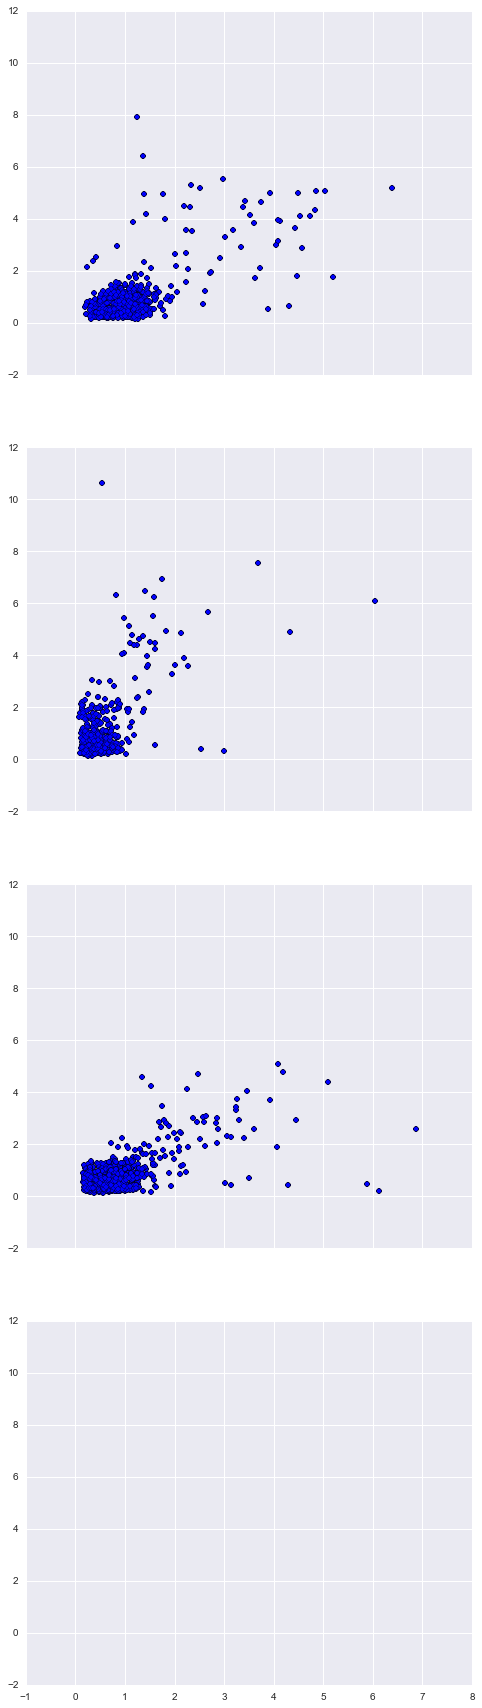

In [236]:
i=df['5mph'][df.label=='Joint'].values
jntii=i[i<sl].astype('int')
for i in range(-20,20):
    jnti=np.concatenate((jnti,jntii+i))
f, ((ax1, ax2,ax3, ax4)) = plt.subplots(4,1, sharex=True, sharey=True,figsize=(8, 30))
ax1.scatter(np.amax(dat[jnti,:,0],axis=1),np.amax(dat[jnti,:,7],axis=1))
ax2.scatter(np.amax(dat[jnti,:,1],axis=1),np.amax(dat[jnti,:,6],axis=1))
ax3.scatter(np.amax(dat[jnti,:,2],axis=1),np.amax(dat[jnti,:,5],axis=1))
ax3.scatter(np.amax(dat[jnti,:,3],axis=1),np.amax(dat[jnti,:,4],axis=1))

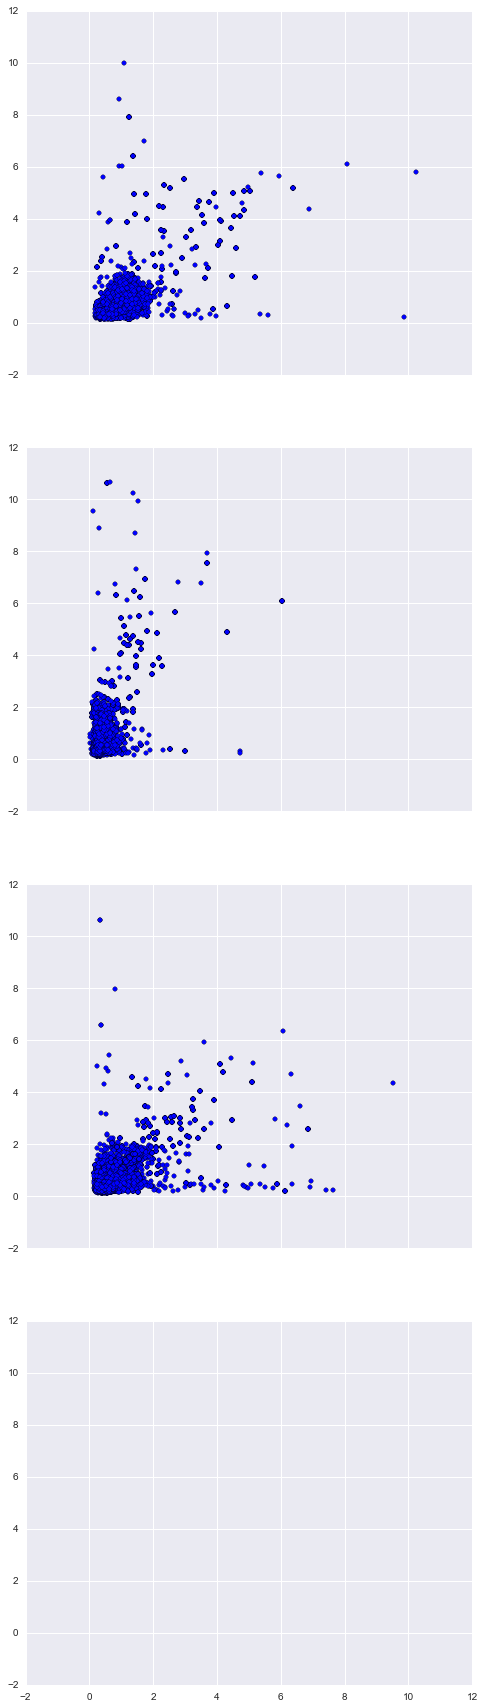

In [238]:
i=df['5mph'][df.label=='Defect'].values
jntii=i[i<sl].astype('int')
for i in range(-20,20):
    jnti=np.concatenate((jnti,jntii+i))
f, ((ax1, ax2,ax3, ax4)) = plt.subplots(4,1, sharex=True, sharey=True,figsize=(8, 30))
ax1.scatter(np.amax(dat[jnti,:,0],axis=1),np.amax(dat[jnti,:,7],axis=1))
ax2.scatter(np.amax(dat[jnti,:,1],axis=1),np.amax(dat[jnti,:,6],axis=1))
ax3.scatter(np.amax(dat[jnti,:,2],axis=1),np.amax(dat[jnti,:,5],axis=1))
ax3.scatter(np.amax(dat[jnti,:,3],axis=1),np.amax(dat[jnti,:,4],axis=1))